In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# read in the dataset
df = pd.read_csv('gdrive/My Drive/casestudy.csv')

In [5]:
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [6]:
df = df.iloc[: , 1:]
df.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [7]:
df.shape

(685927, 3)

In [8]:
unique_years = df['year'].unique()

print(unique_years)

[2015 2016 2017]


In [9]:
# Get the last year with data, since we don't have data for this year
#current_year = datetime.datetime.now().year
current_year = 2017

# Calculate the total revenue for the current year
total_revenue = df[df['year'] == current_year]['net_revenue'].sum()

# Print the total revenue for the current year
print(f'Total revenue for {current_year}: {total_revenue:.2f}')

Total revenue for 2017: 31417495.03


In [10]:
grouped = df.groupby('year')['net_revenue'].sum()

In [11]:
grouped

year
2015    29036749.19
2016    25730943.59
2017    31417495.03
Name: net_revenue, dtype: float64

1.) **Total revenue for the current year**

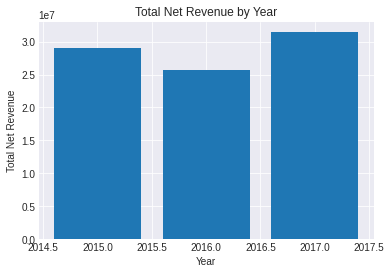

In [13]:
years = grouped.index
total_revenues = grouped.values

# Use the 'seaborn-darkgrid' style
plt.style.use('seaborn-darkgrid')

# Create a bar plot with the total revenue for each year
plt.bar(years, total_revenues)

# Add grid lines
plt.grid(True)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Total Net Revenue')
plt.title('Total Net Revenue by Year')

# Show the plot
plt.show()

2.) **New Customer Revenue**

In [75]:
# Split the data into two dataframes based on the year
df_2015 = df[df['year'] == 2015]
df_2016 = df[df['year'] == 2016]
df_2017 = df[df['year'] == 2017]

# Create a Pandas dataframe with the customers that exist in 2016 but not in 2015
df_2016_new_customers = df_2016[~df_2016['customer_email'].isin(df_2015['customer_email'])]
df_2017_new_customers = df_2017[~df_2017['customer_email'].isin(df_2016['customer_email'])]


In [23]:
revenue_sum_new_customers_2016 = df_2016_new_customers['net_revenue'].sum()
revenue_sum_new_customers_2017 = df_2017_new_customers['net_revenue'].sum()

In [28]:
format_revenue_2016 = "${:0,.2f}".format(revenue_sum_new_customers_2016)
format_revenue_2017 = "${:0,.2f}".format(revenue_sum_new_customers_2017)
print(f'New customer revenue for 2016: {format_revenue_2016}')
print(f'New customer revenue for 2017: {format_revenue_2017}')

New customer revenue for 2016: $18,245,491.01
New customer revenue for 2016: $28,776,235.04


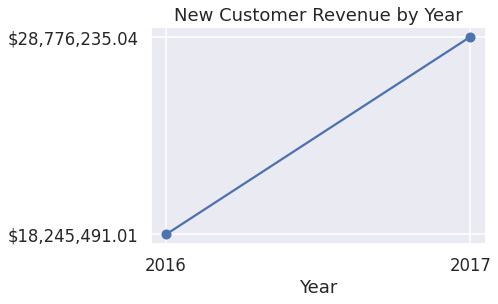

In [35]:
# Create a Pandas dataframe with the revenue for each year
df_revenue = pd.DataFrame({
    'Year': [2016, 2017],
    'New Customer Revenue': [format_revenue_2016, format_revenue_2017]
})

# Set the style and context of the plot
sns.set(style='darkgrid', context='talk')

# Plot the data
plt.plot(df_revenue['Year'], df_revenue['New Customer Revenue'], marker='o')

# Add labels and title to the plot
plt.xlabel('Year')
plt.title('New Customer Revenue by Year')
plt.xticks(df_revenue['Year'])

# Show the plot
plt.show()

3.) **Existing Customer Growth**

In [46]:
# Create a Pandas dataframe with the customers that exist in both 2015 and 2016
df_2015_and_2016 = df_2016[df_2016['customer_email'].isin(df_2015['customer_email'])]
# Create a Pandas dataframe with the customers that exist in both 2016 and 2017
df_2016_and_2017 = df_2017[df_2017['customer_email'].isin(df_2016['customer_email'])]

# Calculate the revenue for the existing customers in 2015-2016
existing_revenue_2016 = df_2015_and_2016['net_revenue'].sum()

# Calculate the revenue for the existing customers in 2016-2017
existing_revenue_2017 = df_2016_and_2017['net_revenue'].sum()

In [51]:
# Calculate the existing customer growth
existing_customer_growth = existing_revenue_2017 - existing_revenue_2016
format_existing_customer_growth= "{:0,.2f}$".format(existing_customer_growth)
# Print the existing customer growth
print(f'Existing Customer Growth: {format_existing_customer_growth}')

Existing Customer Growth: -4,844,192.59$


5.) **Existing Customer Revenue Current Year**

In [59]:
format_existing_revenue_2017= "{:0,.2f}$".format(existing_revenue_2017)
print(f'Existing Customer Revenue Current Year: {format_existing_revenue_2017}')

Existing Customer Revenue Current Year: 2,641,259.99$


6.) **Existing Customer Revenue Prior Year**


In [57]:
format_existing_revenue_2016= "{:0,.2f}$".format(existing_revenue_2016)
print(f'Existing Customer Revenue Prior Year: {format_existing_revenue_2016}')

Existing Customer Revenue Prior Year: 7,485,452.58$


4.) **Revenue lost from attrition**

In [56]:
# Create a Pandas dataframe with the customers that exist in both 2016 and 2017
df_2016_and_2017 = df_2016[df_2016['customer_email'].isin(df_2017['customer_email'])]

# Calculate the revenue for the existing customers in 2016
revenue_2016 = df_2016_and_2017['net_revenue'].sum()

# Calculate the revenue for the existing customers in 2017
revenue_2017 = df_2017[df_2017['customer_email'].isin(df_2016_and_2017['customer_email'])]['net_revenue'].sum()

# Calculate the revenue lost from attrition
attrition_revenue = revenue_2016 - revenue_2017
format_attrition_revenue= "{:0,.2f}$".format(attrition_revenue)
# Print the revenue lost from attrition
print(f'Revenue lost from attrition: {format_attrition_revenue}')

Revenue lost from attrition: -20,611.34$


7,8.) **Total Customers Current and Previous Year**

In [63]:
customers_per_year = df['year'].value_counts().sort_index()
print(customers_per_year)

2015    231294
2016    204646
2017    249987
Name: year, dtype: int64


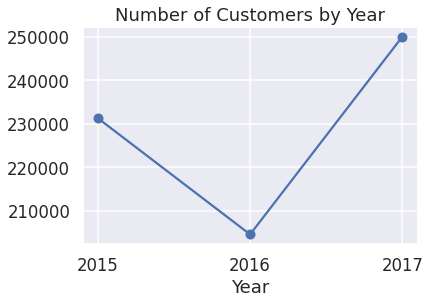

In [65]:
# Set the style and context of the plot
sns.set(style='darkgrid', context='talk')

# Plot the data
plt.plot(customers_per_year.index, customers_per_year.values, marker='o', linestyle='-')

# Add labels and title to the plot
plt.xlabel('Year')
plt.title('Number of Customers by Year')

# Set the x-ticks to be the values in the index of the customers_per_year series
plt.xticks(customers_per_year.index)

# Show the plot
plt.show()

9.) **New Customers per year**

In [78]:
new_customers_2016 = df_2016_new_customers['customer_email'].nunique()
new_customers_2017 = df_2017_new_customers['customer_email'].nunique()


In [79]:
print(new_customers_2016)
print(new_customers_2017)

145062
229028


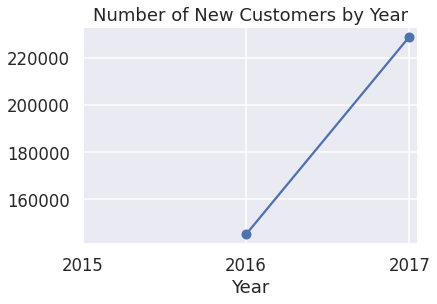

In [83]:
new_customers_per_year = pd.DataFrame({
    'Year': [2016,2017],
    'Number of New Customers': [new_customers_2016,new_customers_2017]
})

# Set the style and context of the plot
sns.set(style='darkgrid', context='talk')

# Plot the data
plt.plot(new_customers_per_year['Year'], new_customers_per_year['Number of New Customers'], marker='o', linestyle='-')

# Add labels and title to the plot
plt.xlabel('Year')
plt.title('Number of New Customers by Year')

# Set the x-ticks to be the values in the index of the new_customers_per_year series
plt.xticks(customers_per_year.index)

# Show the plot
plt.show()


10.) **Lost Customers per Year**

In [86]:
lost_customers_2016 = df_2015[~df_2015['customer_email'].isin(df_2016['customer_email'])]['customer_email'].nunique()
print(lost_customers_2016)

lost_customers_2017 = df_2016[~df_2016['customer_email'].isin(df_2017['customer_email'])]['customer_email'].nunique()
print(lost_customers_2017)

171710
183687


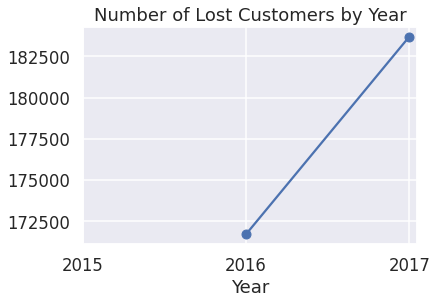

In [88]:
lost_customers_per_year = pd.DataFrame({
    'Year': [2016,2017],
    'Number of Lost Customers': [lost_customers_2016,lost_customers_2017]
})

# Set the style and context of the plot
sns.set(style='darkgrid', context='talk')

# Plot the data
plt.plot(lost_customers_per_year['Year'], lost_customers_per_year['Number of Lost Customers'], marker='o', linestyle='-')

# Add labels and title to the plot
plt.xlabel('Year')
plt.title('Number of Lost Customers by Year')

# Set the x-ticks to be the values in the index of the new_customers_per_year series
plt.xticks(customers_per_year.index)

# Show the plot
plt.show()
